In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# NOTE: Make sure that the class is labeled 'target' in the data file
test_val_data = pd.read_csv('~/Documents/MooreLab/test_validate_data.csv', sep=',', dtype=np.float64)
features = test_val_data.drop('phenotype', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, test_val_data['phenotype'].values, random_state=None)

# Average CV score on the training set was:0.5568528778085564
exported_pipeline = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features=0.4, min_samples_leaf=6,
                                               min_samples_split=4, n_estimators=100, subsample=0.6500000000000001)
exported_pipeline.fit(training_features, training_target)

print(exported_pipeline.score(testing_features, testing_target)) # The score of our ML pipeline on test data (features & target)

# Stores an array of all values of predicted testing_target (our Y, from predicting on our X, testing_features)
yhat_test = exported_pipeline.predict(testing_features)          # Predicts the phenotype for each member of test_val_data

0.5856905158069884


In [48]:
# Sum of absolute value of yhat_test vs testing_target divided by length of testing_target vector
test_err = sum(abs(yhat_test - testing_target))/len(testing_target)
# test_err + yhat_test = 1.0         b/c sum of all the errors + original prediction = 100%

In [49]:
# While exported_pipeline.predict stores the resulting 0 or 1 prediction,
# exported_pipeline.predict_proba stores % chance that each testing_target
# is 0 or 1 as [(chance it's 0), (chance it's 1)]
prob_test = exported_pipeline.predict_proba(testing_features)

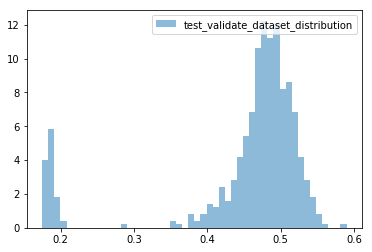

In [50]:
#visualize density plot of second columns (prob of having breast cancer ie phenotype = 1)
prob_test_phenotype_1 = prob_test[:,1]
plt.hist(prob_test_phenotype_1, bins = 50, alpha=0.5, label='test_validate_dataset_distribution', density=True)
plt.legend(loc='upper right')
plt.show()

In [51]:
# Load precision medicine dataset

premed_100data = pd.read_csv('~/Documents/MooreLab/premed.csv', sep=',', dtype=np.float64)
features_pm = premed_100data.drop('phenotype', axis=1).values         # X variables of 100 pm participants
test_pm = premed_100data['phenotype'].values                          # Y variables of 100 pm participants

# So I use the same exported pipeline from earlier, which is already fit to test_validate_data
print(exported_pipeline.score(features_pm, test_pm))                  # Found score using pipeline on pm_data
prob_test_pmdata = exported_pipeline.predict_proba(features_pm)
prob_test_pmdata_phenotype_1 = prob_test_pmdata[:,1]

0.58


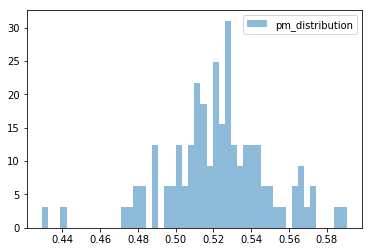

In [52]:
plt.hist(prob_test_pmdata_phenotype_1, bins=50, alpha=0.5, label='pm_distribution', density=True)
plt.legend(loc='upper right')
plt.show()

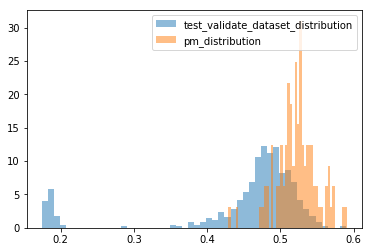

In [53]:
# Run both density plots
plt.hist(prob_test_phenotype_1, bins = 50, alpha=0.5, label='test_validate_dataset_distribution', density=True)
plt.hist(prob_test_pmdata_phenotype_1, bins=50, alpha=0.5, label='pm_distribution', density=True)
plt.legend(loc='upper right')
plt.show()

In [ ]:
#then go to precision medicine dataset, grab ONE individual, 
# run pipeline i.e prob_test_of_one_patient_in_premeddataset = exported_pipeline.predict_proba(the one participant's 29 SNP)
# see where that patient falls in the density plot

features_pm

pmtest_sub_1 = features_pm[0,]
exported_pipeline.predict_proba(pmtest_sub_1) # initial risk score

# modify pmtest_sub_1 mutation rs1234 (i.e. the first column)
pmtest_sub_1['rs1234']
pmtest_sub_1['rs1234'] = 2
exported_pipeline.predict_proba(pmtest_sub_1) # modified risk score


# How to systematically do this for all 29 mutations? For loop? Are we visualizing every time?
# Tentatively, change, call predict_proba, store in new array - but how are we systematically changing 0, 1, 2?
